# <center>YOLO Drone Detection Dataset</center>


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Import Libraries</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install --upgrade ultralytics

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade ray

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yaml
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", font_scale=1.5, font="SimHei", rc={"axes.unicode_minus":False})

import torch
from ultralytics import YOLO

from PIL import Image

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Modeling</div>

In [6]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 73.7MB/s]


In [8]:
config = {
    "path": "/kaggle/input/yolo-drone-detection-dataset/drone_dataset",
    "train": "/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train",
    "val": "/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid",
    "nc": 1,
    "names": ["drone"],
}

with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [9]:
!wandb disabled

W&B disabled.


In [10]:
results = model.train(data="data.yaml", epochs=40, save_period=10, seed=seed)

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]
2024-07-17 20:15:48,404	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-17 20:15:48,679	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/labels... 1011 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1012/1012 [00:05<00:00, 190.11it/s]

train: WARNING ⚠️ /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/images/pic_722.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/images/pic_722.jpg'


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid/labels... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [00:01<00:00, 203.88it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.32G      1.444      2.226      1.648         44        640:  72%|███████▏  | 46/64 [00:16<00:05,  3.39it/s]libpng warning: iCCP: known incorrect sRGB profile
       1/40      2.32G      1.433      2.143      1.636         42        640:  92%|█████████▏| 59/64 [00:20<00:01,  3.22it/s]libpng warning: iCCP: known incorrect sRGB profile
       1/40      2.32G      1.432      2.137      1.634         38        640:  94%|█████████▍| 60/64 [00:20<00:01,  3.85it/s]libpng warning: iCCP: known incorrect sRGB profile
       1/40      2.34G      1.424      2.122      1.633          4        640: 100%|██████████| 64/64 [00:22<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        347        369      0.597      0.472      0.519       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.25G      1.369      1.704      1.579         47        640:  50%|█████     | 32/64 [00:09<00:11,  2.69it/s]libpng warning: iCCP: known incorrect sRGB profile
       2/40      2.25G      1.374        1.7      1.579         58        640:  53%|█████▎    | 34/64 [00:09<00:09,  3.23it/s]libpng warning: iCCP: known incorrect sRGB profile
       2/40      2.25G      1.389       1.71      1.581         51        640:  78%|███████▊  | 50/64 [00:15<00:04,  2.99it/s]libpng warning: iCCP: known incorrect sRGB profile
       2/40      2.28G      1.408      1.727      1.599          7        640: 100%|██████████| 64/64 [00:19<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/11 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]


                   all        347        369      0.443      0.453      0.406      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.25G      1.467      1.679      1.619         39        640:  19%|█▉        | 12/64 [00:02<00:13,  3.88it/s]libpng warning: iCCP: known incorrect sRGB profile
       3/40      2.25G      1.455      1.645      1.626         41        640:  66%|██████▌   | 42/64 [00:11<00:05,  3.79it/s]libpng warning: iCCP: known incorrect sRGB profile
       3/40      2.27G      1.473      1.611      1.636         11        640: 100%|██████████| 64/64 [00:18<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]

                   all        347        369      0.496      0.493       0.42      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.26G      1.466      1.494      1.616         40        640:   3%|▎         | 2/64 [00:00<00:07,  7.78it/s]libpng warning: iCCP: known incorrect sRGB profile
       4/40      2.26G      1.451      1.473      1.584         40        640:  22%|██▏       | 14/64 [00:03<00:12,  4.12it/s]libpng warning: iCCP: known incorrect sRGB profile
       4/40      2.26G      1.463      1.464      1.618         48        640:  88%|████████▊ | 56/64 [00:16<00:02,  3.00it/s]libpng warning: iCCP: known incorrect sRGB profile
       4/40      2.27G      1.466      1.469      1.623          9        640: 100%|██████████| 64/64 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]


                   all        347        369      0.258      0.482       0.28      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.26G      1.505       1.48      1.643         43        640:   9%|▉         | 6/64 [00:00<00:10,  5.38it/s]libpng warning: iCCP: known incorrect sRGB profile
       5/40      2.26G      1.498      1.445      1.647         36        640:  73%|███████▎  | 47/64 [00:13<00:04,  3.69it/s]libpng warning: iCCP: known incorrect sRGB profile
       5/40      2.26G      1.472      1.409      1.633         37        640:  94%|█████████▍| 60/64 [00:17<00:00,  4.00it/s]libpng warning: iCCP: known incorrect sRGB profile
       5/40      2.27G      1.469      1.398      1.631          6        640: 100%|██████████| 64/64 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.664      0.413       0.47       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.26G      1.442      1.302      1.614         57        640:  44%|████▍     | 28/64 [00:06<00:09,  3.86it/s]libpng warning: iCCP: known incorrect sRGB profile
       6/40      2.26G       1.45      1.313      1.617         40        640:  47%|████▋     | 30/64 [00:07<00:08,  3.88it/s]libpng warning: iCCP: known incorrect sRGB profile
       6/40      2.27G      1.441      1.335      1.603          8        640: 100%|██████████| 64/64 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]


                   all        347        369      0.698      0.583      0.637      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.26G      1.381      1.275      1.556         41        640:  33%|███▎      | 21/64 [00:05<00:14,  3.01it/s]libpng warning: iCCP: known incorrect sRGB profile
       7/40      2.26G      1.401      1.256       1.58         34        640:  64%|██████▍   | 41/64 [00:11<00:05,  3.95it/s]libpng warning: iCCP: known incorrect sRGB profile
       7/40      2.26G      1.411      1.277      1.583         50        640:  81%|████████▏ | 52/64 [00:15<00:04,  2.67it/s]libpng warning: iCCP: known incorrect sRGB profile
       7/40      2.27G      1.414      1.289      1.587          8        640: 100%|██████████| 64/64 [00:18<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        347        369      0.785      0.678      0.762      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.26G      1.412      1.248      1.576         43        640:  19%|█▉        | 12/64 [00:03<00:15,  3.38it/s]libpng warning: iCCP: known incorrect sRGB profile
       8/40      2.26G      1.417      1.225       1.58         40        640:  41%|████      | 26/64 [00:07<00:09,  3.99it/s]libpng warning: iCCP: known incorrect sRGB profile
       8/40      2.26G      1.431      1.248      1.586         37        640:  62%|██████▎   | 40/64 [00:11<00:05,  4.01it/s]libpng warning: iCCP: known incorrect sRGB profile
       8/40      2.27G      1.405      1.218      1.564         16        640: 100%|██████████| 64/64 [00:18<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/11 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]

                   all        347        369      0.729       0.73      0.752      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.26G      1.372        1.2       1.52         57        640:  27%|██▋       | 17/64 [00:04<00:15,  3.06it/s]libpng warning: iCCP: known incorrect sRGB profile
       9/40      2.26G      1.373      1.201      1.522         38        640:  28%|██▊       | 18/64 [00:04<00:14,  3.28it/s]libpng warning: iCCP: known incorrect sRGB profile
       9/40      2.27G      1.331      1.137      1.504          7        640: 100%|██████████| 64/64 [00:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        347        369      0.802      0.748      0.783      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.28G      1.321      1.093      1.472         51        640:  30%|██▉       | 19/64 [00:05<00:16,  2.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      10/40      2.28G      1.327      1.093      1.479         42        640:  31%|███▏      | 20/64 [00:05<00:12,  3.49it/s]libpng warning: iCCP: known incorrect sRGB profile
      10/40      2.28G      1.334        1.1      1.479         38        640:  34%|███▍      | 22/64 [00:05<00:10,  4.07it/s]libpng warning: iCCP: known incorrect sRGB profile
      10/40      2.29G      1.336      1.103      1.485         10        640: 100%|██████████| 64/64 [00:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.777      0.707      0.715      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.26G      1.326      1.021      1.477         44        640:  28%|██▊       | 18/64 [00:04<00:10,  4.32it/s]libpng warning: iCCP: known incorrect sRGB profile
      11/40      2.26G      1.332      1.023      1.478         48        640:  30%|██▉       | 19/64 [00:04<00:13,  3.40it/s]libpng warning: iCCP: known incorrect sRGB profile
      11/40      2.26G       1.34      1.058      1.495         42        640:  91%|█████████ | 58/64 [00:16<00:01,  3.59it/s]libpng warning: iCCP: known incorrect sRGB profile
      11/40      2.27G       1.34      1.058      1.494          7        640: 100%|██████████| 64/64 [00:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]


                   all        347        369      0.804      0.736      0.798      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.28G       1.35      1.042       1.53         42        640:  25%|██▌       | 16/64 [00:03<00:11,  4.34it/s]libpng warning: iCCP: known incorrect sRGB profile
      12/40      2.28G      1.327      1.062      1.523         47        640:  41%|████      | 26/64 [00:06<00:09,  4.11it/s]libpng warning: iCCP: known incorrect sRGB profile
      12/40      2.28G        1.3      1.058      1.488         47        640:  91%|█████████ | 58/64 [00:16<00:01,  3.43it/s]libpng warning: iCCP: known incorrect sRGB profile
      12/40      2.29G      1.307      1.054      1.489          8        640: 100%|██████████| 64/64 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        347        369      0.783      0.791      0.837      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.26G      1.344      1.022      1.468         49        640:  12%|█▎        | 8/64 [00:01<00:14,  3.98it/s]libpng warning: iCCP: known incorrect sRGB profile
      13/40      2.26G      1.303      1.005      1.461         40        640:  19%|█▉        | 12/64 [00:03<00:16,  3.15it/s]libpng warning: iCCP: known incorrect sRGB profile
      13/40      2.26G      1.304      1.024      1.469         43        640:  30%|██▉       | 19/64 [00:05<00:17,  2.56it/s]libpng warning: iCCP: known incorrect sRGB profile
      13/40      2.27G      1.309      1.018      1.476         10        640: 100%|██████████| 64/64 [00:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 2/11 [00:00<00:01,  5.22it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]


                   all        347        369      0.802       0.64       0.71      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.26G       1.26     0.9549      1.415         43        640:  16%|█▌        | 10/64 [00:02<00:15,  3.44it/s]libpng warning: iCCP: known incorrect sRGB profile
      14/40      2.26G      1.255     0.9583      1.446         39        640:  83%|████████▎ | 53/64 [00:15<00:02,  4.26it/s]libpng warning: iCCP: known incorrect sRGB profile
      14/40      2.27G      1.265     0.9682      1.449          9        640: 100%|██████████| 64/64 [00:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        347        369      0.878      0.762      0.833      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.26G      1.287     0.9709      1.462         48        640:  44%|████▍     | 28/64 [00:07<00:09,  3.70it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
      15/40      2.26G      1.275     0.9563      1.457         43        640:  67%|██████▋   | 43/64 [00:11<00:05,  3.53it/s]libpng warning: iCCP: known incorrect sRGB profile
      15/40      2.27G      1.265     0.9597      1.449         11        640: 100%|██████████| 64/64 [00:18<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        347        369      0.842      0.726      0.813      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.26G      1.209     0.9035      1.399         42        640:  22%|██▏       | 14/64 [00:03<00:12,  4.09it/s]libpng warning: iCCP: known incorrect sRGB profile
      16/40      2.26G      1.208     0.9137      1.404         43        640:  56%|█████▋    | 36/64 [00:09<00:07,  3.68it/s]libpng warning: iCCP: known incorrect sRGB profile
      16/40      2.26G      1.206      0.913      1.402         44        640:  58%|█████▊    | 37/64 [00:10<00:08,  3.03it/s]libpng warning: iCCP: known incorrect sRGB profile
      16/40      2.26G      1.219     0.9055      1.409         41        640:  97%|█████████▋| 62/64 [00:17<00:00,  3.42it/s]libpng warning: iCCP: known incorrect sRGB profile
      16/40      2.27G      1.222     0.9066       1.41          8        640: 100%|██████████| 64/64 [00:18<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 2/11 [00:00<00:01,  5.89it/s]libpng warning: iCCP: known i

                   all        347        369      0.822      0.794      0.816      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.26G      1.213     0.9047      1.421         42        640:  97%|█████████▋| 62/64 [00:18<00:00,  3.25it/s]libpng warning: iCCP: known incorrect sRGB profile
      17/40      2.27G      1.216     0.9023      1.423          7        640: 100%|██████████| 64/64 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]


                   all        347        369      0.853      0.832      0.865      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.26G      1.257     0.8991      1.403         39        640:  20%|██        | 13/64 [00:02<00:12,  4.18it/s]libpng warning: iCCP: known incorrect sRGB profile
      18/40      2.26G      1.213     0.8881      1.395         42        640:  64%|██████▍   | 41/64 [00:11<00:07,  3.13it/s]libpng warning: iCCP: known incorrect sRGB profile
      18/40      2.26G      1.217     0.8933      1.403         38        640:  88%|████████▊ | 56/64 [00:16<00:02,  3.34it/s]libpng warning: iCCP: known incorrect sRGB profile
      18/40      2.27G      1.211      0.896      1.401          9        640: 100%|██████████| 64/64 [00:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]


                   all        347        369      0.864      0.858      0.896      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.26G      1.231     0.9246      1.386         52        640:  12%|█▎        | 8/64 [00:01<00:11,  4.70it/s]libpng warning: iCCP: known incorrect sRGB profile
      19/40      2.26G      1.222     0.9158      1.389         39        640:  14%|█▍        | 9/64 [00:01<00:13,  4.22it/s]libpng warning: iCCP: known incorrect sRGB profile
      19/40      2.26G      1.201     0.8895      1.394         42        640:  77%|███████▋  | 49/64 [00:13<00:04,  3.75it/s]libpng warning: iCCP: known incorrect sRGB profile
      19/40      2.27G      1.191     0.8879      1.389         11        640: 100%|██████████| 64/64 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        347        369      0.843      0.813      0.869      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.26G      1.175     0.9022       1.42         44        640:  19%|█▉        | 12/64 [00:02<00:17,  2.91it/s]libpng warning: iCCP: known incorrect sRGB profile
      20/40      2.26G      1.167     0.8601      1.401         40        640:  48%|████▊     | 31/64 [00:08<00:10,  3.21it/s]libpng warning: iCCP: known incorrect sRGB profile
      20/40      2.26G       1.17     0.8611      1.408         41        640:  69%|██████▉   | 44/64 [00:12<00:05,  3.54it/s]libpng warning: iCCP: known incorrect sRGB profile
      20/40      2.27G      1.165     0.8539      1.397          9        640: 100%|██████████| 64/64 [00:18<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.856      0.819      0.871      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.26G      1.043     0.7154      1.323         43        640:   2%|▏         | 1/64 [00:00<00:07,  7.95it/s]libpng warning: iCCP: known incorrect sRGB profile
      21/40      2.26G      1.123      0.833      1.332         48        640:  23%|██▎       | 15/64 [00:03<00:15,  3.07it/s]libpng warning: iCCP: known incorrect sRGB profile
      21/40      2.26G      1.133     0.8178      1.345         43        640:  88%|████████▊ | 56/64 [00:16<00:02,  3.89it/s]libpng warning: iCCP: known incorrect sRGB profile
      21/40      2.27G      1.129     0.8247      1.344          7        640: 100%|██████████| 64/64 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   9%|▉         | 1/11 [00:00<00:01,  5.62it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]

                   all        347        369      0.888      0.773      0.852      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.26G     0.9598     0.7018      1.275         43        640:   2%|▏         | 1/64 [00:00<00:08,  7.34it/s]libpng warning: iCCP: known incorrect sRGB profile
      22/40      2.26G       1.12     0.8102      1.339         39        640:  22%|██▏       | 14/64 [00:03<00:12,  4.08it/s]libpng warning: iCCP: known incorrect sRGB profile
      22/40      2.27G      1.142     0.8149      1.366         10        640: 100%|██████████| 64/64 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.72it/s]

                   all        347        369      0.859      0.793      0.881      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.26G      1.187     0.8514        1.4         49        640:  12%|█▎        | 8/64 [00:01<00:11,  4.91it/s]libpng warning: iCCP: known incorrect sRGB profile
      23/40      2.26G      1.166     0.8369      1.376         42        640:  22%|██▏       | 14/64 [00:03<00:13,  3.82it/s]libpng warning: iCCP: known incorrect sRGB profile
      23/40      2.26G      1.155     0.8192      1.352         50        640:  62%|██████▎   | 40/64 [00:11<00:08,  2.99it/s]libpng warning: iCCP: known incorrect sRGB profile
      23/40      2.27G      1.158     0.8288       1.37          9        640: 100%|██████████| 64/64 [00:18<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        347        369      0.843      0.851      0.866      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.26G      1.292      0.856      1.433         47        640:   2%|▏         | 1/64 [00:00<00:08,  7.65it/s]libpng warning: iCCP: known incorrect sRGB profile
      24/40      2.26G      1.153     0.8262      1.359         45        640:  33%|███▎      | 21/64 [00:05<00:11,  3.60it/s]libpng warning: iCCP: known incorrect sRGB profile
      24/40      2.26G       1.15      0.818      1.354         49        640:  36%|███▌      | 23/64 [00:05<00:11,  3.55it/s]libpng warning: iCCP: known incorrect sRGB profile
      24/40      2.27G      1.125     0.7925      1.342          6        640: 100%|██████████| 64/64 [00:19<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        347        369      0.904      0.851      0.891      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.26G      1.088     0.7653      1.312         39        640:  33%|███▎      | 21/64 [00:05<00:10,  4.20it/s]libpng warning: iCCP: known incorrect sRGB profile
      25/40      2.26G        1.1     0.7677      1.325         39        640:  66%|██████▌   | 42/64 [00:11<00:06,  3.32it/s]libpng warning: iCCP: known incorrect sRGB profile
      25/40      2.26G      1.106     0.7683      1.333         38        640:  84%|████████▍ | 54/64 [00:15<00:03,  2.59it/s]libpng warning: iCCP: known incorrect sRGB profile
      25/40      2.26G      1.108     0.7678      1.335         44        640:  97%|█████████▋| 62/64 [00:18<00:00,  3.26it/s]libpng warning: iCCP: known incorrect sRGB profile
      25/40      2.27G      1.111     0.7722      1.343          7        640: 100%|██████████| 64/64 [00:18<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]

                   all        347        369      0.877      0.831      0.875       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.26G      1.067     0.7233      1.304         47        640:  58%|█████▊    | 37/64 [00:10<00:10,  2.67it/s]libpng warning: iCCP: known incorrect sRGB profile
      26/40      2.26G      1.068     0.7205      1.305         49        640:  64%|██████▍   | 41/64 [00:11<00:09,  2.55it/s]libpng warning: iCCP: known incorrect sRGB profile
      26/40      2.27G      1.074     0.7171      1.311         10        640: 100%|██████████| 64/64 [00:18<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.884      0.856      0.903       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.26G      1.153      0.792      1.391         45        640:   8%|▊         | 5/64 [00:00<00:11,  5.27it/s]libpng warning: iCCP: known incorrect sRGB profile
      27/40      2.26G       1.13     0.7868      1.346         44        640:  12%|█▎        | 8/64 [00:01<00:12,  4.53it/s]libpng warning: iCCP: known incorrect sRGB profile
      27/40      2.26G      1.121     0.7621      1.326         55        640:  27%|██▋       | 17/64 [00:04<00:11,  3.96it/s]libpng warning: iCCP: known incorrect sRGB profile
      27/40      2.27G      1.104     0.7404      1.335          7        640: 100%|██████████| 64/64 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.898      0.883      0.919      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.26G      0.987     0.7199       1.29         37        640:   8%|▊         | 5/64 [00:00<00:11,  5.17it/s]libpng warning: iCCP: known incorrect sRGB profile
      28/40      2.26G      1.064     0.7151      1.317         38        640:  72%|███████▏  | 46/64 [00:12<00:05,  3.44it/s]libpng warning: iCCP: known incorrect sRGB profile
      28/40      2.26G      1.059     0.7085       1.31         51        640:  89%|████████▉ | 57/64 [00:15<00:01,  3.74it/s]libpng warning: iCCP: known incorrect sRGB profile
      28/40      2.27G      1.073     0.7136      1.314          6        640: 100%|██████████| 64/64 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        347        369      0.953      0.859       0.93      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.26G       1.09     0.7115      1.305         43        640:  44%|████▍     | 28/64 [00:07<00:10,  3.35it/s]libpng warning: iCCP: known incorrect sRGB profile
      29/40      2.26G      1.084     0.7163      1.305         42        640:  70%|███████   | 45/64 [00:12<00:05,  3.33it/s]libpng warning: iCCP: known incorrect sRGB profile
      29/40      2.26G      1.085     0.7148      1.305         44        640:  77%|███████▋  | 49/64 [00:14<00:04,  3.58it/s]libpng warning: iCCP: known incorrect sRGB profile
      29/40      2.27G      1.078     0.7117      1.297          9        640: 100%|██████████| 64/64 [00:18<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        347        369      0.842      0.851      0.881      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.26G      0.986     0.6471      1.261         35        640:  11%|█         | 7/64 [00:01<00:14,  4.05it/s]libpng warning: iCCP: known incorrect sRGB profile
      30/40      2.26G      0.989     0.6595      1.244         45        640:  31%|███▏      | 20/64 [00:05<00:11,  3.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      30/40      2.26G      1.015     0.6717      1.263         48        640:  66%|██████▌   | 42/64 [00:12<00:06,  3.60it/s]libpng warning: iCCP: known incorrect sRGB profile
      30/40      2.27G      1.028     0.6817      1.274          9        640: 100%|██████████| 64/64 [00:18<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        347        369      0.929      0.848      0.925      0.543


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
      31/40      2.26G     0.9121     0.6296      1.292         16        640:  19%|█▉        | 12/64 [00:04<00:15,  3.38it/s]libpng warning: iCCP: known incorrect sRGB profile
      31/40      2.26G     0.9449     0.5882      1.301         17        640:  81%|████████▏ | 52/64 [00:16<00:02,  4.18it/s]libpng warning: iCCP: known incorrect sRGB profile
      31/40      2.26G     0.9478      0.585      1.314          3        640: 100%|██████████| 64/64 [00:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        347        369      0.867      0.864      0.911      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.26G     0.9531     0.5209       1.32         28        640:   6%|▋         | 4/64 [00:00<00:07,  7.70it/s]libpng warning: iCCP: known incorrect sRGB profile
      32/40      2.26G     0.9836     0.5821      1.305         22        640:   9%|▉         | 6/64 [00:01<00:11,  5.16it/s]libpng warning: iCCP: known incorrect sRGB profile
      32/40      2.26G     0.9509     0.5309      1.292         17        640:  69%|██████▉   | 44/64 [00:12<00:05,  3.97it/s]libpng warning: iCCP: known incorrect sRGB profile
      32/40      2.27G     0.9586      0.522      1.311          3        640: 100%|██████████| 64/64 [00:18<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.889      0.848      0.908      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.26G     0.8729     0.4896      1.258         18        640:  34%|███▍      | 22/64 [00:05<00:10,  3.93it/s]libpng warning: iCCP: known incorrect sRGB profile
      33/40      2.26G     0.8682     0.4897      1.266         17        640:  52%|█████▏    | 33/64 [00:08<00:08,  3.72it/s]libpng warning: iCCP: known incorrect sRGB profile
      33/40      2.26G     0.8785     0.5002      1.279         16        640:  66%|██████▌   | 42/64 [00:11<00:05,  4.02it/s]libpng warning: iCCP: known incorrect sRGB profile
      33/40      2.27G     0.9063     0.5133       1.29          4        640: 100%|██████████| 64/64 [00:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.911      0.833      0.903      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.26G      0.928     0.4962      1.265         21        640:  27%|██▋       | 17/64 [00:04<00:13,  3.46it/s]libpng warning: iCCP: known incorrect sRGB profile
      34/40      2.26G     0.8978     0.4901      1.265         16        640:  53%|█████▎    | 34/64 [00:09<00:07,  3.82it/s]libpng warning: iCCP: known incorrect sRGB profile
      34/40      2.26G     0.9001     0.4956      1.249         16        640:  95%|█████████▌| 61/64 [00:17<00:00,  3.49it/s]libpng warning: iCCP: known incorrect sRGB profile
      34/40      2.26G     0.8949     0.4925      1.244          3        640: 100%|██████████| 64/64 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.927      0.886      0.928      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.26G     0.8587      0.476      1.224         17        640:  72%|███████▏  | 46/64 [00:12<00:04,  4.21it/s]libpng warning: iCCP: known incorrect sRGB profile
      35/40      2.26G     0.8545     0.4704      1.231         19        640:  88%|████████▊ | 56/64 [00:15<00:02,  3.72it/s]libpng warning: iCCP: known incorrect sRGB profile
      35/40      2.26G     0.8579     0.4723      1.236         20        640:  92%|█████████▏| 59/64 [00:16<00:01,  3.27it/s]libpng warning: iCCP: known incorrect sRGB profile
      35/40      2.26G     0.8675      0.476      1.243          3        640: 100%|██████████| 64/64 [00:18<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        347        369      0.929      0.875      0.921      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.26G     0.8775     0.4357      1.336         16        640:   2%|▏         | 1/64 [00:00<00:08,  7.51it/s]libpng warning: iCCP: known incorrect sRGB profile
      36/40      2.26G      0.869     0.4684      1.245         20        640:  12%|█▎        | 8/64 [00:01<00:12,  4.32it/s]libpng warning: iCCP: known incorrect sRGB profile
      36/40      2.26G     0.8615     0.4841      1.228         17        640:  53%|█████▎    | 34/64 [00:09<00:07,  3.77it/s]libpng warning: iCCP: known incorrect sRGB profile
      36/40      2.27G     0.8593     0.4731      1.226          6        640: 100%|██████████| 64/64 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        347        369      0.924      0.897      0.926      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.26G     0.8013     0.4406      1.193         17        640:  48%|████▊     | 31/64 [00:08<00:09,  3.47it/s]libpng warning: iCCP: known incorrect sRGB profile
      37/40      2.26G     0.8018     0.4435      1.189         18        640:  52%|█████▏    | 33/64 [00:08<00:08,  3.53it/s]libpng warning: iCCP: known incorrect sRGB profile
      37/40      2.26G     0.8134      0.444       1.19         16        640:  89%|████████▉ | 57/64 [00:16<00:01,  4.37it/s]libpng warning: iCCP: known incorrect sRGB profile
      37/40      2.27G     0.8159     0.4491      1.188          3        640: 100%|██████████| 64/64 [00:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.923       0.88      0.929      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.28G     0.7945     0.4493      1.194         16        640:  64%|██████▍   | 41/64 [00:11<00:05,  3.97it/s]libpng warning: iCCP: known incorrect sRGB profile
      38/40      2.28G     0.8022     0.4486      1.194         17        640:  75%|███████▌  | 48/64 [00:13<00:05,  3.16it/s]libpng warning: iCCP: known incorrect sRGB profile
      38/40      2.28G      0.807     0.4492      1.196         17        640:  81%|████████▏ | 52/64 [00:14<00:03,  3.54it/s]libpng warning: iCCP: known incorrect sRGB profile
      38/40      2.28G     0.8196     0.4519      1.193          3        640: 100%|██████████| 64/64 [00:18<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.909      0.889      0.929      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.25G     0.8089     0.4241      1.189         16        640:  34%|███▍      | 22/64 [00:05<00:11,  3.56it/s]libpng warning: iCCP: known incorrect sRGB profile
      39/40      2.25G      0.796     0.4188      1.179         19        640:  39%|███▉      | 25/64 [00:06<00:09,  3.91it/s]libpng warning: iCCP: known incorrect sRGB profile
      39/40      2.25G      0.796     0.4259      1.179         27        640:  45%|████▌     | 29/64 [00:07<00:08,  3.94it/s]libpng warning: iCCP: known incorrect sRGB profile
      39/40      2.26G     0.8043     0.4306      1.204          3        640: 100%|██████████| 64/64 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        347        369      0.911      0.864      0.918      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.25G     0.7946     0.4467      1.198         16        640:  33%|███▎      | 21/64 [00:05<00:12,  3.33it/s]libpng warning: iCCP: known incorrect sRGB profile
      40/40      2.25G     0.8055     0.4369      1.196         18        640:  56%|█████▋    | 36/64 [00:09<00:07,  3.63it/s]libpng warning: iCCP: known incorrect sRGB profile
      40/40      2.25G     0.7992     0.4358      1.192         29        640:  66%|██████▌   | 42/64 [00:11<00:06,  3.57it/s]libpng warning: iCCP: known incorrect sRGB profile
      40/40      2.26G     0.7886     0.4272      1.185          3        640: 100%|██████████| 64/64 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.917      0.859      0.913      0.555



40 epochs completed in 0.267 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]


                   all        347        369      0.929      0.875       0.92      0.569
Speed: 0.6ms preprocess, 1.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


In [14]:
# Save the trained model
model.save("/kaggle/working/yolov8n_pretrained.pt")

In [15]:
metrics = model.val()

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid/labels... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [00:00<00:00, 622.83it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.90it/s]


                   all        347        369      0.925      0.875      0.921      0.569
Speed: 0.7ms preprocess, 5.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


In [16]:
print(metrics.box.map)

0.5690490595636539


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Predict Test Data</div>

In [19]:
paths = glob.glob("/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid/images/*")


0: 640x640 1 drone, 8.4ms
1: 640x640 1 drone, 8.4ms
2: 640x640 1 drone, 8.4ms
3: 640x640 1 drone, 8.4ms
4: 640x640 1 drone, 8.4ms
5: 640x640 1 drone, 8.4ms
6: 640x640 1 drone, 8.4ms
7: 640x640 1 drone, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


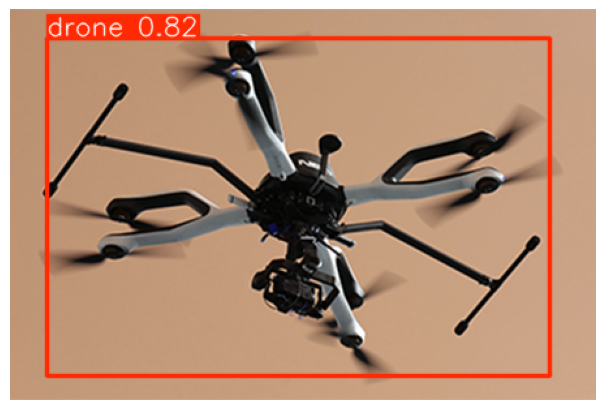

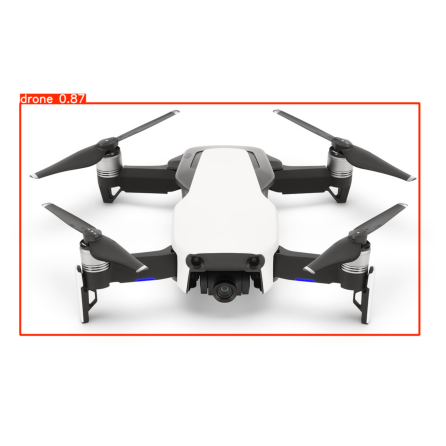

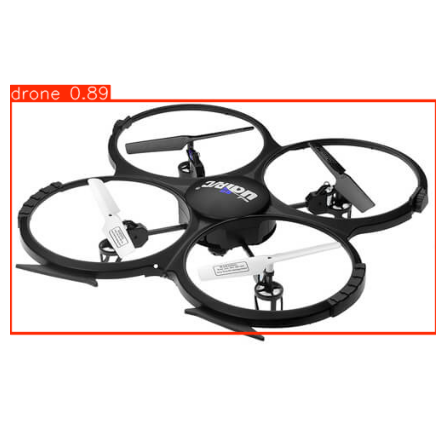

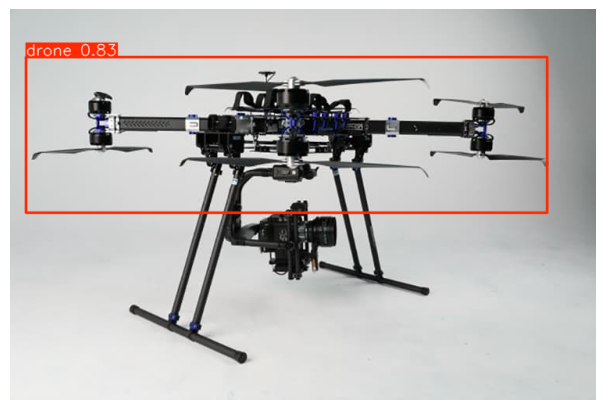

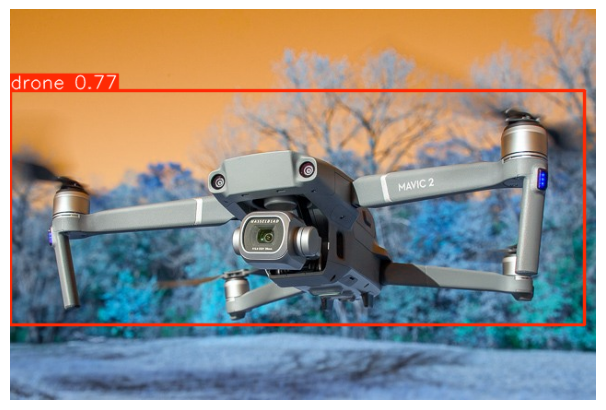

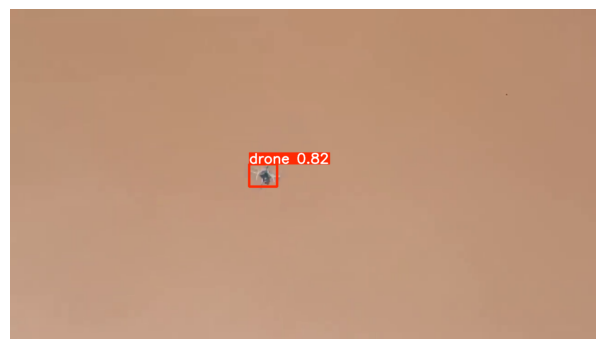

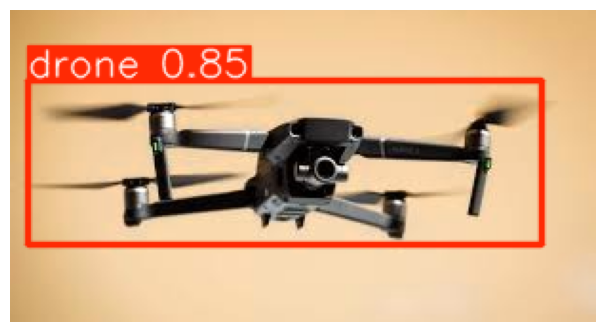

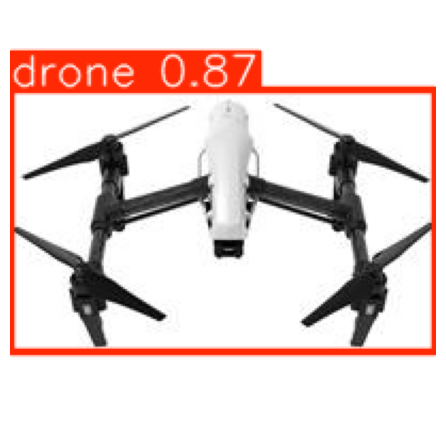

In [20]:
n = 8
results = model.predict(paths[:n])
for i in range(n):
    r = results[i]
    img = Image.fromarray(r.plot())
    plt.figure(dpi=100)
    plt.imshow(img)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [27]:
!ls /kaggle/working

data.yaml  runs  wandb	yolov8n.pt  yolov8n_pretrained.pt
